<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-links:" data-toc-modified-id="Useful-links:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful links:</a></span></li><li><span><a href="#Files" data-toc-modified-id="Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Files</a></span><ul class="toc-item"><li><span><a href="#Writing-to-files" data-toc-modified-id="Writing-to-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Writing to files</a></span></li><li><span><a href="#Reading-from-files" data-toc-modified-id="Reading-from-files-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reading from files</a></span></li></ul></li><li><span><a href="#Plotting-and-Visualization" data-toc-modified-id="Plotting-and-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting and Visualization</a></span></li><li><span><a href="#Arrays" data-toc-modified-id="Arrays-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Arrays</a></span><ul class="toc-item"><li><span><a href="#Creating-arrays" data-toc-modified-id="Creating-arrays-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Creating arrays</a></span></li><li><span><a href="#Indexing-and-slicing" data-toc-modified-id="Indexing-and-slicing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Indexing and slicing</a></span></li><li><span><a href="#Array-reshaping" data-toc-modified-id="Array-reshaping-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Array reshaping</a></span></li></ul></li><li><span><a href="#Array-Datatypes" data-toc-modified-id="Array-Datatypes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Array Datatypes</a></span></li><li><span><a href="#Array-Arithmetic" data-toc-modified-id="Array-Arithmetic-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Array Arithmetic</a></span><ul class="toc-item"><li><span><a href="#Element-by-Element" data-toc-modified-id="Element-by-Element-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Element-by-Element</a></span></li><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Matrix multiplication</a></span></li></ul></li><li><span><a href="#An-Example" data-toc-modified-id="An-Example-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>An Example</a></span></li><li><span><a href="#More-on-File-reading-and-writing:" data-toc-modified-id="More-on-File-reading-and-writing:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>More on File reading and writing:</a></span><ul class="toc-item"><li><span><a href="#Saving-&amp;-Loading-numpy-arrays" data-toc-modified-id="Saving-&amp;-Loading-numpy-arrays-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Saving &amp; Loading numpy arrays</a></span></li><li><span><a href="#Reading-Binary-files" data-toc-modified-id="Reading-Binary-files-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Reading Binary files</a></span></li></ul></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Useful links:

- [numpy documentation](https://numpy.org)
- [matplotlib documentation](https://matplotlib.org)
- [scipy documentation](https://scipy.org)


# Files

Here comes a quick intro how write and read to files.

## Writing to files

To open a file for reading or writing use the `open` function. `open()`
returns a file object, and is most commonly used with two arguments: open(filename, mode).

In [3]:
outfile=open("myRicker.csv", 'wt')

It is commonly used with two arguments: `open(filename, mode)` where the `mode` takes the values:
- `w` open for writing. An existing file with the same name will be erased.
- `a` opens the file for appending; any data written to the file is automatically added to the end. 
- `r` opens the file for both reading only.
By default text mode `t` is used that means, you read and write strings from and to the file, which are encoded in a specific encoding. `b` appended to the mode opens the file in binary mode: now the data is read and written in the form of bytes objects. 

It is good practice to close a file immediately  if it is not used 

In [4]:
outfile.close()

We want to write some code that writes the *Ricker* wavelet of a period of
`length` and given frequency `f` to the files `myRicker.csv` in the comma-separated-value (CSV) format. The time is incremented by `dt`.  

In [5]:
length=0.128
f=25
dt=0.001

In [6]:
import math
def getRicker(t, f=25):
    """
    return the value of the Ricker wavelet at time t for peak frequency f
    """
    r = (1.0 - 2.0*(math.pi**2)*(f**2)*(t**2)) * math.exp(-(math.pi**2)*(f**2)*(t**2))
    return r

In [7]:
t=-length/2
n=0
outfile=open("myRicker.csv", 'wt')
while t < length/2:
    outfile.write("{0}, {1}\n".format(t, getRicker(t, f)))
    t+=dt
    n+=1
outfile.close()
print("{0} records writen to {1}.".format(n, outfile.name))

128 records writen to myRicker.csv.


You can download/open the file ['myRicker.csv'](myRicker.csv).
**Notice**: There is an extra new line character `\n` at the of string in the `write` statement. This makes sure that separate rows can be identified in the file.

## Reading from files

Now we want to read this back. First we need to open the file for reading:

In [8]:
infile=open("myRicker.csv", 'r')

We then can read the entire file as a string:

In [9]:
content=infile.read()
content[0:100]

'-0.064, -5.27136925728684e-10\n-0.063, -1.1173524267190238e-09\n-0.062, -2.3381171400259564e-09\n-0.061'

Don't forget to close the file:

In [10]:
infile.close()

Or more brutally:

In [11]:
infile=open("myRicker.csv", 'r')
del infile

Sometimes it is easier to read the file line by line, where a line is marked by `'\n'` (on Linux). `n` counts the number of lines read.

In [12]:
infile=open("myRicker.csv", 'r')
n=0
for line in infile:
    print(line)
    n+=1
infile.close()
print("{0} records read from {1}.".format(n, infile.name))

-0.064, -5.27136925728684e-10

-0.063, -1.1173524267190238e-09

-0.062, -2.3381171400259564e-09

-0.061, -4.829961330118064e-09

-0.06, -9.849492519747993e-09

-0.059, -1.9827498101588072e-08

-0.057999999999999996, -3.9400015079778947e-08

-0.056999999999999995, -7.728394379303434e-08

-0.055999999999999994, -1.4963597118176504e-07

-0.05499999999999999, -2.859732275429077e-07

-0.05399999999999999, -5.394429261629258e-07

-0.05299999999999999, -1.0043469397615302e-06

-0.05199999999999999, -1.8455538703657271e-06

-0.05099999999999999, -3.347033830018695e-06

-0.04999999999999999, -5.990576756873976e-06

-0.04899999999999999, -1.0581227239614576e-05

-0.04799999999999999, -1.8443565585705677e-05

-0.046999999999999986, -3.1723163222511795e-05

-0.045999999999999985, -5.3840711229035125e-05

-0.044999999999999984, -9.016255634689051e-05

-0.043999999999999984, -0.00014897023964985473

-0.04299999999999998, -0.00024283180637907622

-0.04199999999999998, -0.00039049653924134266

-0.0409

Now we want split each line to get the time and corresponding wavelet value. The numbers are 
collected as floats in two lists `times` and `ricker`:

In [13]:
infile=open("myRicker.csv", 'r')

times=[]
ricker=[]
for line in infile:
    a, b=line.split(',')
    times.append(float(a))
    ricker.append(float(b))
infile.close()
print("{0} records read from {1}.".format(len(times), infile.name))

128 records read from myRicker.csv.


Notice that the end of file is reached when the read line is empty (len(line)=0). Then the loop is exited.

In [14]:
times[:10]

[-0.064,
 -0.063,
 -0.062,
 -0.061,
 -0.06,
 -0.059,
 -0.057999999999999996,
 -0.056999999999999995,
 -0.055999999999999994,
 -0.05499999999999999]

# Plotting and Visualization

We would like to plot the Ricker wavelet. 
The `matplotlib` library provides a convenient, flexible and powerful tool for visualization at least for 2D data sets. Here we can give only a very brief introduction with more functionality being presented as the course evolves. 
For a comprehensive documentation and list of examples we refer to the [matplotlib web page](https://matplotlib.org).

Here we use the `matplotlib.pyplot` library which is a collection of command style functions but there 
is also a more general API which gives a reacher functionality:

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt

It is very easy to plot data point we have read:

<IPython.core.display.Javascript object>


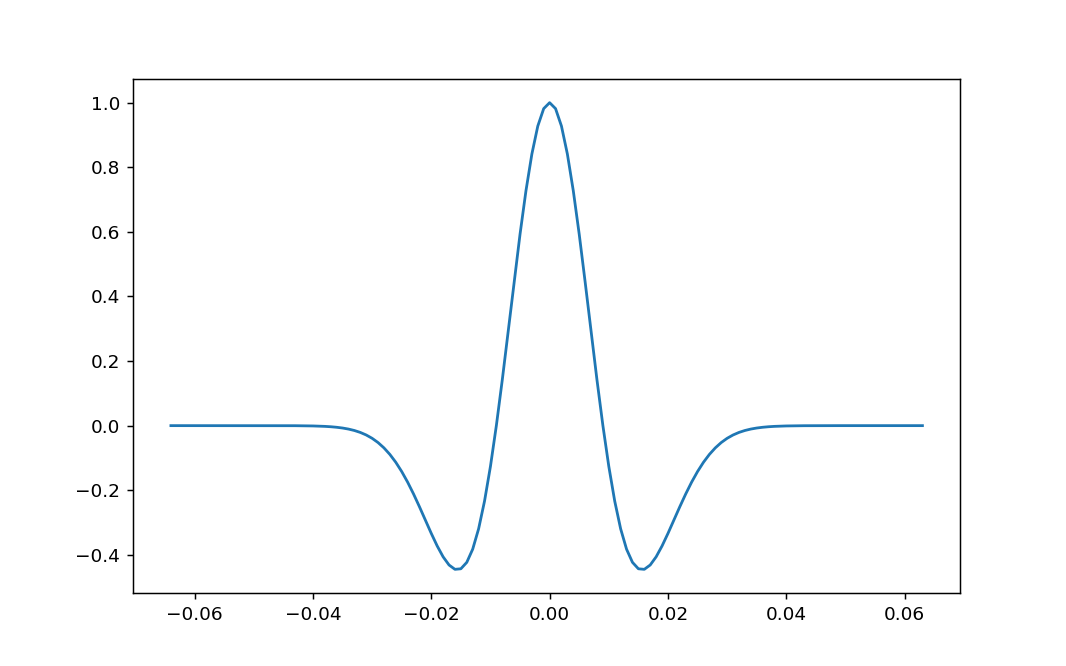

In [96]:
plt.figure(figsize=(8,5))
plt.scatter(times, ricker)

We can also plot this as a function rather than just data point:

In [97]:
plt.clf()
plt.plot(times, ricker)

Let's do this properly with a lenged, axis labels and title:

In [18]:
f=15.
plt.clf()
plt.plot(times, ricker, 'r:', label="function")
plt.scatter(times, ricker, c='b', s=10, label="data")
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title(f'Ricker wavelet for frequency f = {f} hz')
plt.legend()
plt.grid(True)

As now we want to save the plot to the  file `"ricker.png"`:

In [19]:
plt.savefig("ricker.png")

Notice that the file extension defined the file format. 
Click [here](ricker.png) to see ricker.png for the file.

Let's take a quick look at an image:

<IPython.core.display.Javascript object>


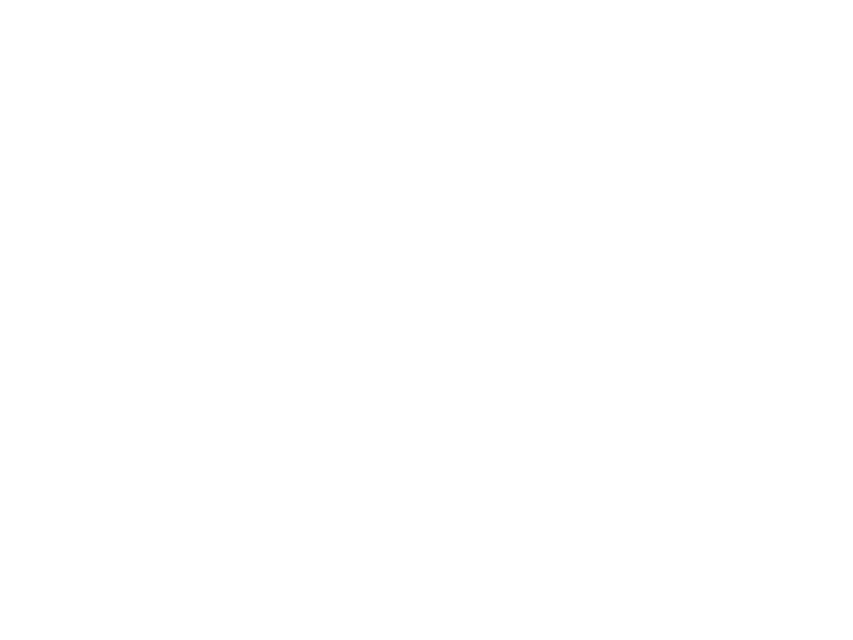

Text(0.5, 1.0, 'My Ricker')

In [20]:
plt.figure()
image = plt.imread("ricker.png")
plt.imshow(image)
plt.axis('off')
plt.title('My Ricker')

# Arrays

Dealing with  multidimensional array is a key functionality in scientific computing. 
The `numpy` module is the core library for this. It provides a rich set of tools to create and manipulate
arrays including tools signal processing and linear algebra. 
`numpy` works seamlessly with the `scipy` module providing further numerical capabilities 
and with `matplotlib` as introduced before. 

In this section we give an introduction into `numpy` and also in some more `matplotlib` capabilities.

## Creating arrays

We can initialize `numpy` arrays from python lists:

In [21]:
import numpy as np
a = np.array([-1., -2., -3.]) 

The type of `a` is `numpy.ndarray`

In [22]:
type(a)

numpy.ndarray

numpy arrays have a shape:

In [23]:
a.shape

(3,)

We can print entries (also called elements) of the array analogously to lists:

In [24]:
a[0], a[1], a[2]

(-1.0, -2.0, -3.0)

Arrays can have a higher rank:

In [25]:
b = np.array([[1,2,3],[4,5,6]]) 
b

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
b.shape

(2, 3)

So `b` be read having has two rows and three columns. 
Elements are accessed by a double index:

In [27]:
b[0, 0], b[0, 1], b[1, 0]

(1, 2, 4)

`Numpy` also provides several functions to create arrays for instance:

Create an array of zeros - here of shape `(2,2)`:

In [28]:
np.zeros((2,2)) 

array([[0., 0.],
       [0., 0.]])

Or an array array of ones - try shape `(3,2)`:

In [29]:
np.ones((3,2)) 

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

There is an easy way to create a 3x3 identity matrix:

In [30]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

How about a 2x2 random matrix:

In [31]:
np.random.random((2,2))

array([[0.88544042, 0.33562516],
       [0.63344899, 0.71578625]])

## Indexing and slicing

One would expect a convenient way to access elements in an array. In deed arrays support slicing:

In [32]:
c = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [33]:
c

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Get the second row of `c`. Again counting rows starts with zero:

In [34]:
c[1, :]

array([5, 6, 7, 8])

You can get rows 1 and 2 in one go:

In [35]:
c[1:3, :]

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

The same works for column. Lets try the second column:

In [36]:
c[:, 1]

array([ 2,  6, 10])

and the second and third column together:  

In [37]:
c[:, 1:3]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

Slicing as well as indexing can be used to modify specific entries in an array. 
For instance multiplying the second row of `c` by -1:

In [38]:
c[1, :]*=-1
c

array([[ 1,  2,  3,  4],
       [-5, -6, -7, -8],
       [ 9, 10, 11, 12]])

or setting the columns 1 and 3 to 101:

In [39]:
c[:, [1,3]]=101
c

array([[  1, 101,   3, 101],
       [ -5, 101,  -7, 101],
       [  9, 101,  11, 101]])

Boolean array indexing allows picking arbitrary elements of an array based on a mask for instance to 
get the elements out of an array that satisfy some conditions: 

In [40]:
d = np.array([[1,2], [3, 4], [5, 6]])

In [41]:
d

array([[1, 2],
       [3, 4],
       [5, 6]])

Here we create a mask of those values in `c` that have a value larger than 3:

In [42]:
mask = d > 3
mask

array([[False, False],
       [False,  True],
       [ True,  True]])

This mask can be used to gather all entries where the mask is True:

In [43]:
d[mask]

array([4, 5, 6])

Notice that the array returned is one-dimensional (shape `(3,)`).
This can be done in one line without the extra `mask`:

In [44]:
d[d>3]

array([4, 5, 6])

Masks can also be used to assign new values to entries that meet a condition. For instance to set 
all values less or equal to three to zero:

In [45]:
d[d<=3]=0
d

array([[0, 0],
       [0, 4],
       [5, 6]])

## Array reshaping

Transposing an array is done by using the T attribute of an array object:

In [46]:
d = np.array([[1,2], [3, 4], [5, 6]])

In [47]:
d

array([[1, 2],
       [3, 4],
       [5, 6]])

In [48]:
d.T

array([[1, 3, 5],
       [2, 4, 6]])

In [49]:
d.shape, d.T.shape

((3, 2), (2, 3))

Push array into a new shape:

In [50]:
np.reshape(d, (6,))

array([1, 2, 3, 4, 5, 6])

In [51]:
np.reshape(d, (2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

**Warning** reshaping does not create a copy just a different view!
Let's test this. `s` is a reshaped version of `d` with shape `(6,)`: 

In [52]:
s=np.reshape(d, (6, ))

`s[1]` and `d[0,1]` have the same value:

In [53]:
s[1], d[0,1]

(2, 2)

Now we change the second entry of `s` to -1:

In [54]:
s[1]=-1

and `d[0,1]` has also changed:

In [55]:
s[1] == d[0,1]

True

# Array Datatypes

Every numpy array has elements of the same type. Numpy makes assumption or tries to guess a data type when you create an array. In general all functions creating arrays have an optional parameter to explicitly specify the data type the user wants. More on types can be found [here](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

Here all entries in the list of the np.array are integers so the resulting array is integer:

In [56]:
x=np.array([1, 2]) 
x.dtype

dtype('int64')

but it is sufficient to change one of the list entries to a float type to make the created array of type float:

In [57]:
x=np.array([1, 2.]) 
x.dtype

dtype('float64')

You can also enforce the result to be of a specific type regardless of the list entries using the `dtype` argument:

In [58]:
x=np.array([1, 2], dtype=np.float) 
x.dtype

dtype('float64')

`dtype` can be any standart python type: `np.int`, `np.float`, `np.complex` and also given in string form `'i'`, `'f'` and `'c'`. But there are more types available and you can also construct your own, see [dtype](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

# Array Arithmetic

## Element-by-Element

As basic mathematical functions operate element-wise on arrays there is no need to loop over the entries. This is computationally more efficient and allows for clearer code.

Here some examples:

In [59]:
x = np.array([[1,2],[3,4]], dtype=np.float)
y = np.array([[5,6],[7,8]], dtype=np.float
            )

This is element-by-element sum:

In [60]:
x + y

array([[ 6.,  8.],
       [10., 12.]])

This is element-by-element sum:

In [61]:
x - y

array([[-4., -4.],
       [-4., -4.]])

Just flip the sign:

In [62]:
-x

array([[-1., -2.],
       [-3., -4.]])

Of course there is also element-by-element multiplication and division:

In [63]:
x*y, x / y

(array([[ 5., 12.],
        [21., 32.]]),
 array([[0.2       , 0.33333333],
        [0.42857143, 0.5       ]]))

This can also be done in place to save memory and compute time but `x` is changing now:

In [64]:
x*=y
x

array([[ 5., 12.],
       [21., 32.]])

Element-by-element square root (and other unitary operations) requires `numpy` function:

In [65]:
np.sqrt(x)

array([[2.23606798, 3.46410162],
       [4.58257569, 5.65685425]])

## Matrix multiplication

The dot function is used to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. Here some examples: 

In [66]:
X = np.array([[1,2],[3,4]])
Y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

Dot product of two vectors returning a floating point number:

In [67]:
np.dot(v,w)

219

Matrix vector product of matrix `X` and vector `v`: 

In [68]:
np.dot(X,v)

array([29, 67])

This is the same like applying the inner product between the rows 0 and 1 of `X` with vector `v`

In [69]:
np.array([np.dot(X[0,:],v), np.dot(X[1,:],v)])

array([29, 67])

There is also a matrix-matrix product:

In [70]:
np.dot(X,Y)

array([[19, 22],
       [43, 50]])

# An Example

To illustrate how to work with `numpy` in a practical application we would like to interpolate some
scattered gravity Bouguer anomaly data to a rectangular grid. The data are given in a CSV file so we need to 
first read the CSV file, define a grid and then interpolate the scattered data to the grid. As the range covered 
by the data is not rectangular we need to remove improper data before writing the interpolated data back to a CSV file. Of course we also want to plot the interpolated data.  

Let's get started:

`numpy` is providing a variety of functions to directly load data files into arrays. 
The `loadtxt` function is commonly used to load CSV files. Where we are loading the
CSV file [gravity_tasmania.csv](./Data/gravity_tasmania.csv) into the 
array `gdata`. The data set is a the measurement of vertical gravity anomalies at various stations
across Tasmania. It has three columns namely the easting and northing of the station 
and the measured and corrected gravity in mGal. The columns are separated by commas 
and contains commend marked by `#`:

In [71]:
x, y , grav =np.loadtxt("./Data/gravity_tasmania.csv", delimiter=',', comments="#", unpack=True)
print("number of records =",len(x))

number of records = 151


The argument `unpack=True` has the effect that the columns are returned as a tuple with three 1D arrays.  
Let's get some info from `x`:

In [72]:
x.shape, x.max(), x.min(), x.mean()

((151,), 540170.0, 513940.0, 531560.0662251656)

We plot the position of the stations as a scatter plot:

<IPython.core.display.Javascript object>


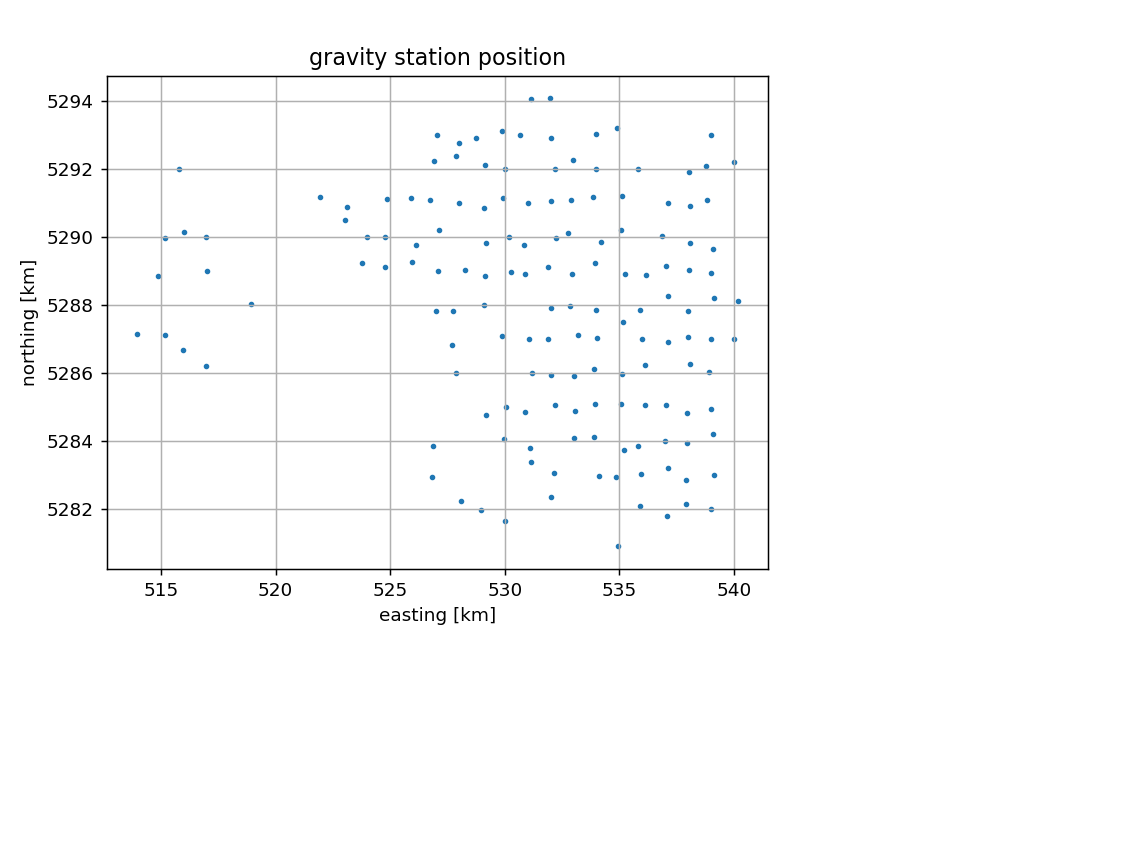

Text(0.5, 1.0, 'gravity station position')

In [73]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x*1e-3, y*1e-3, s=4)
plt.xlabel('easting [km]')
plt.ylabel('northing [km]')
plt.grid(True)
plt.title("gravity station position")

We would like to plot the gravity distribution as recorder at the stations. For this
we interpolate the data from the point observations to a regular grid. First 
we create the grid lines `xi` and `yi` along the x and y axis using `linspace` which
return evenly spaced numbers over a specified interval:

In [74]:
xline=np.linspace(x.min(),x.max(),50)
yline=np.linspace(y.min(),y.max(),50)

Then these grid line positions are combined to actual grid node positions using `meshgrid`:

In [75]:
xi,yi = np.meshgrid(xline,yline)

In [76]:
xi.shape

(50, 50)

<IPython.core.display.Javascript object>


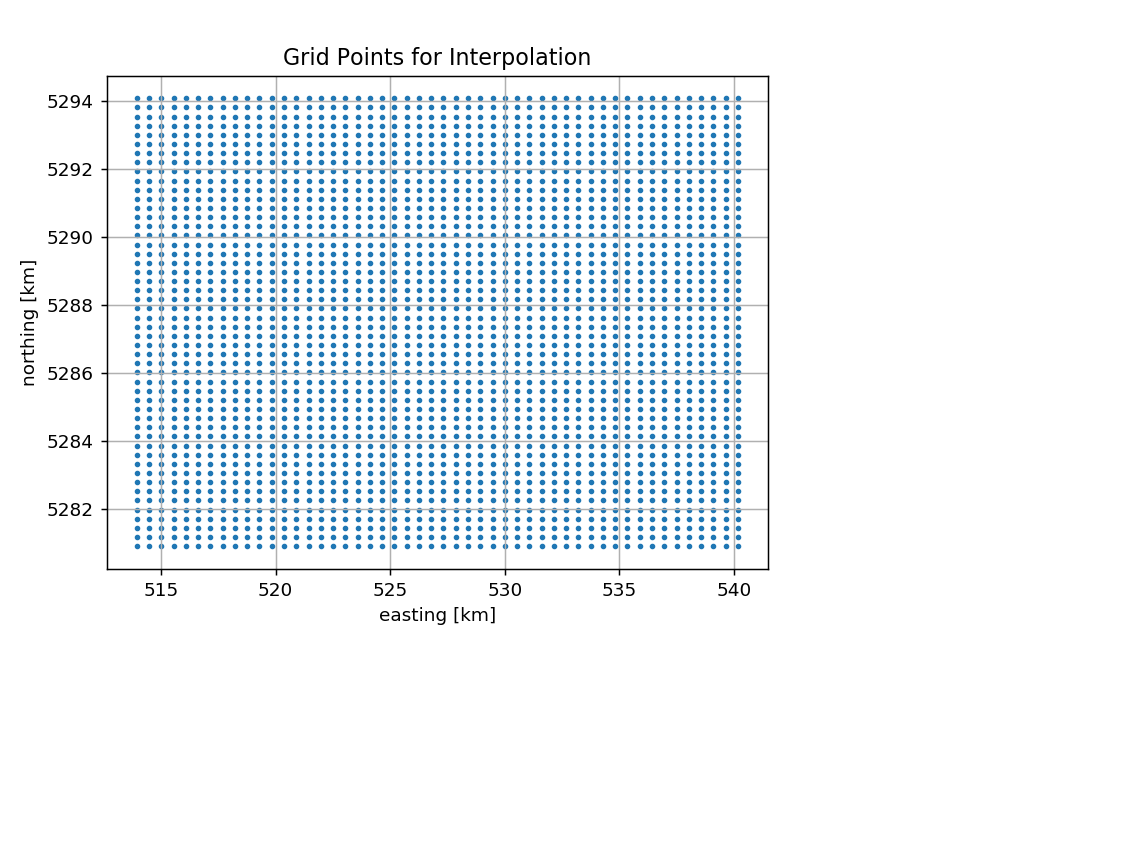

Text(0.5, 1.0, 'Grid Points for Interpolation')

In [77]:
plt.figure()
plt.scatter(xi*1e-3, yi*1e-3, s=4)
plt.xlabel('easting [km]')
plt.ylabel('northing [km]')
plt.grid(True)
plt.title("Grid Points for Interpolation")

Now we use the `griddata` function of the `scipy` to interpolate the scattered data `grav` at `(x,y)` to the 
grid nodes `(xi, yi)`:

In [78]:
from scipy.interpolate import griddata
gravi = griddata((x,y),grav,(xi,yi),method='linear')

Now we can plot the interpolated data `gravi` using contours:

<IPython.core.display.Javascript object>


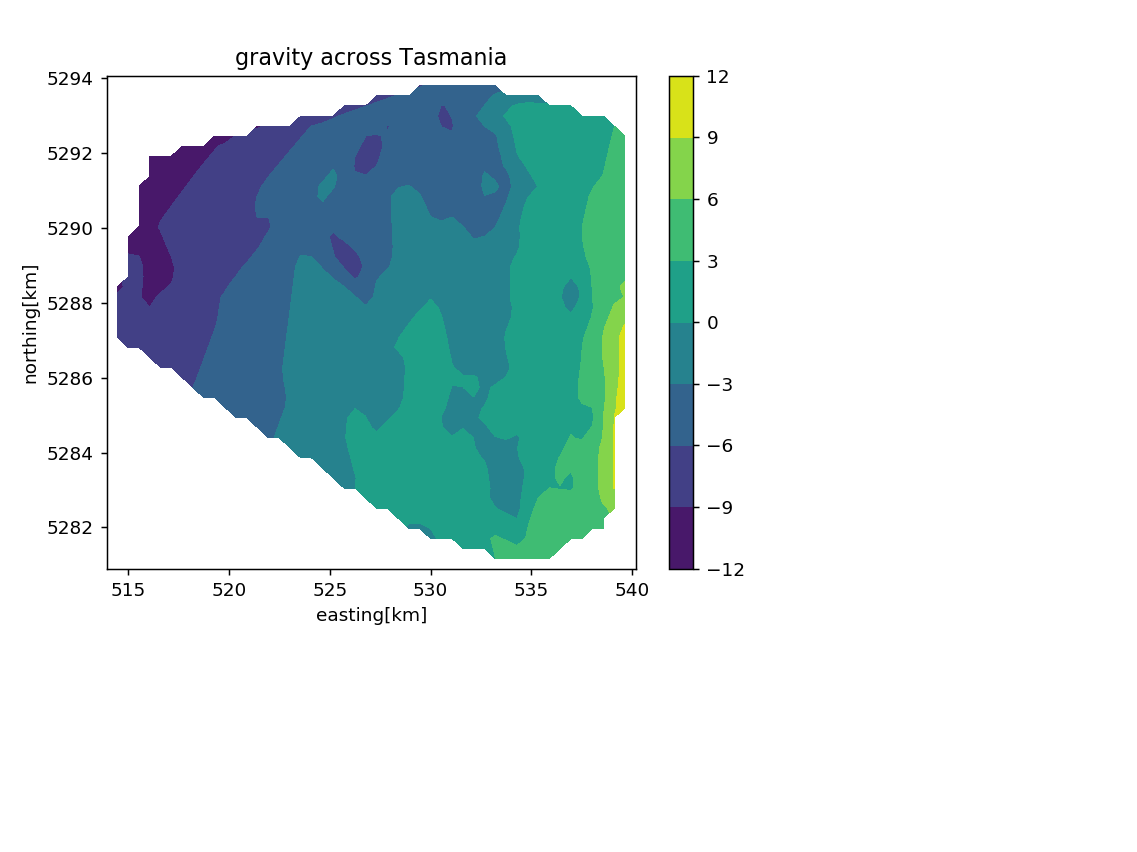

Text(0.5, 1.0, 'gravity across Tasmania')

In [79]:
plt.figure()
plt.contourf(xi*1e-3, yi*1e-3, gravi)
plt.colorbar()
plt.xlabel('easting[km]')
plt.ylabel('northing[km]')
plt.title("gravity across Tasmania")

What happens at the uncoloured area:

In [80]:
gravi[1:5]

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,  2.98933455,  3.59086377,  4.19239299,  3.83524284,
         4.76225475,  5.04193688,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,    

Now we want to write the interpolated data `gravi` but only those data that have been interpolated (not set to `nan`). So we first create an masked index to mark these entries:

In [81]:
idx_notnan=np.logical_not(np.isnan(gravi))

Then we put the entries in `xi`, `yi` and `gravi` that correspond to non-nan entries in `gravi` into a new array `interpolated_data`.  `axis=-1` makes the stacking to work column-wise. 

In [82]:
interpolated_data=np.stack((xi[idx_notnan],yi[idx_notnan],gravi[idx_notnan]), axis=-1)

And then we write them to a file ['test.out'](test.out):

In [83]:
np.savetxt('test.out', interpolated_data, delimiter=',')

# More on File reading and writing:

## Saving & Loading numpy arrays

Sometimes one want to save a `numpy` arrays for later use for instance if the computational work to 
create them was quite intense. We test this with two random arrays.

In [84]:
s=np.random.random((6, 30))

And a second array:

In [85]:
t=np.random.random((5, 3, 6))

The [`savez`](https://numpy.org/doc/stable/reference/generated/numpy.savez.html#numpy.savez) function of `numpy` allows for fast dumping of arrays to a file (here `example`) where arrays can be labeled for easier retrieval (here `"samples"` and `"table"`):

In [86]:
 np.savez('example', samples=s, table= t)

Using [`load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) functions 
the arrays can be reloaded:

In [87]:
data=np.load('example.npz')

The arrays can then be retrieved using keywords (here `"samples"` and `"table"`):

In [88]:
data['samples'].shape

(6, 30)

In [89]:
data['table'].shape

(5, 3, 6)

## Reading Binary files

`numpy` provides also a mechanism to read (and write) arrays as binary files. 
Here we reading the "./Data/marmousi.bin" file which gives a seismic velocity distribution unsing the `fromfile` function of `numpy`. The values are given as 32 bit floating point numbers. This needs to be specified by argument `dtype="f4"`:


In [90]:
velocity_data = np.fromfile("./Data/marmousi.bin", dtype="f4")

The veolcity data need to be reshaped as a $384 \times 122$ array. Notice that this 
information are not obtained from the file itself:

In [91]:
velocity = velocity_data.reshape((384, 122))

We can now plot the `velocity` data using `plt.imshow` assuming an horizontal extent of $4600m$ and a depth of $1500m$

<IPython.core.display.Javascript object>


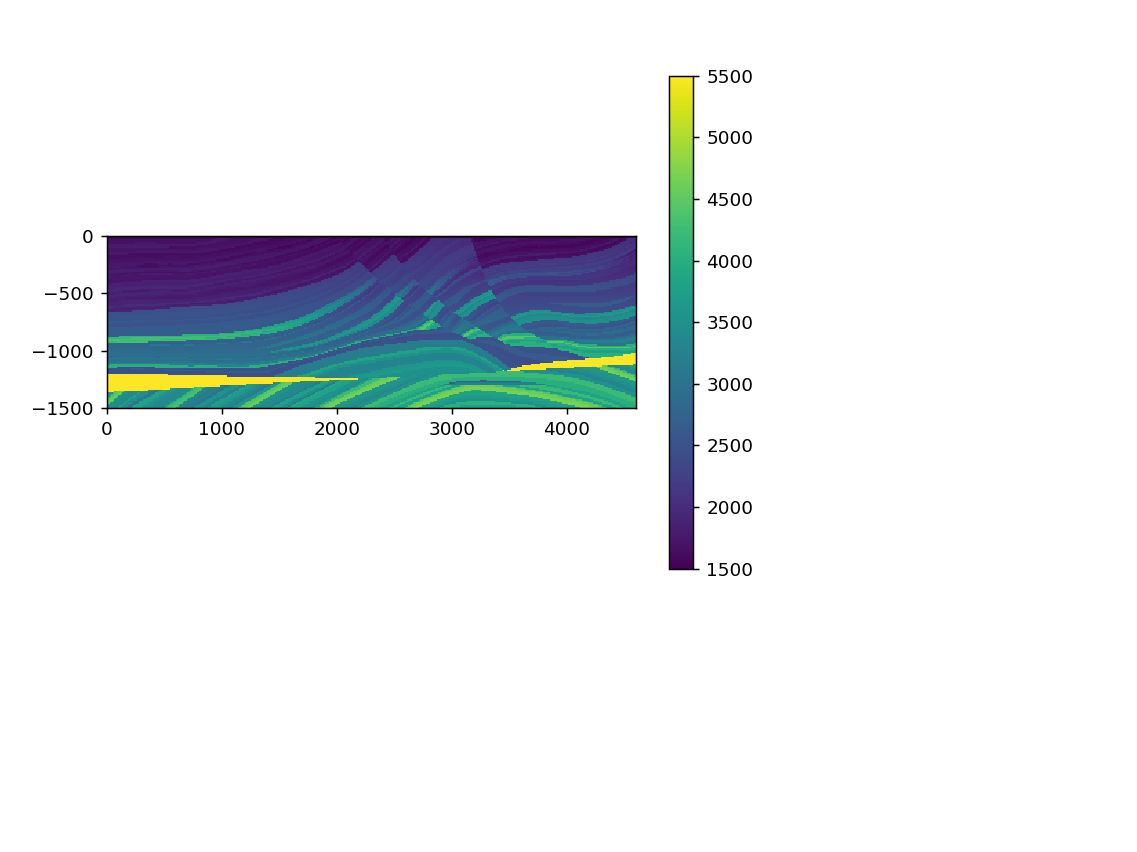

In [92]:
plt.figure()
plt.imshow(velocity.T, extent=(0, 4600., -1500,0))
plt.colorbar()